In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Mobile.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


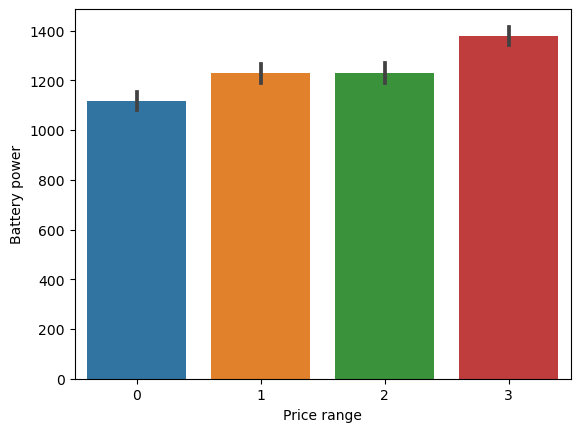

In [4]:
sns.barplot(data=df, x="price_range", y="battery_power")
plt.xlabel("Price range")
plt.ylabel("Battery power")
plt.show()

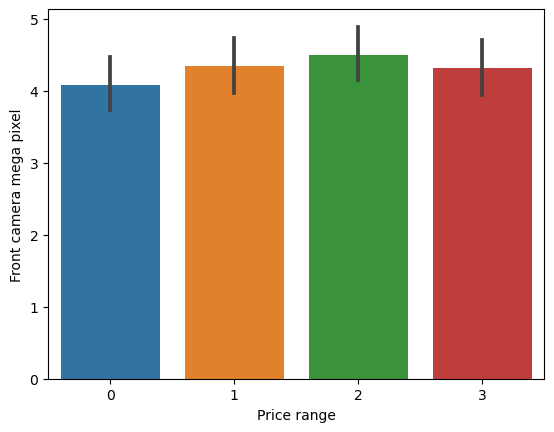

In [5]:
sns.barplot(data=df, x="price_range", y="fc")
plt.xlabel("Price range")
plt.ylabel("Front camera mega pixel")
plt.show()

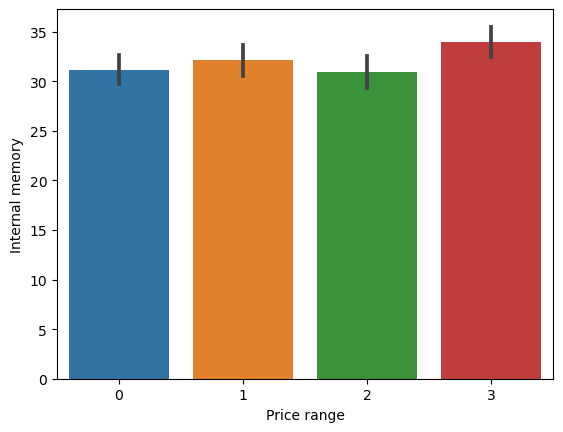

In [6]:
sns.barplot(data=df, x="price_range", y="int_memory")
plt.xlabel("Price range")
plt.ylabel("Internal memory")
plt.show()

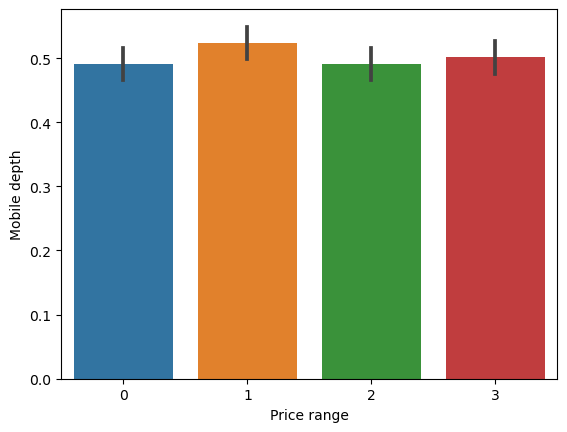

In [7]:
sns.barplot(data=df, x="price_range", y="m_dep")
plt.xlabel("Price range")
plt.ylabel("Mobile depth")
plt.show()

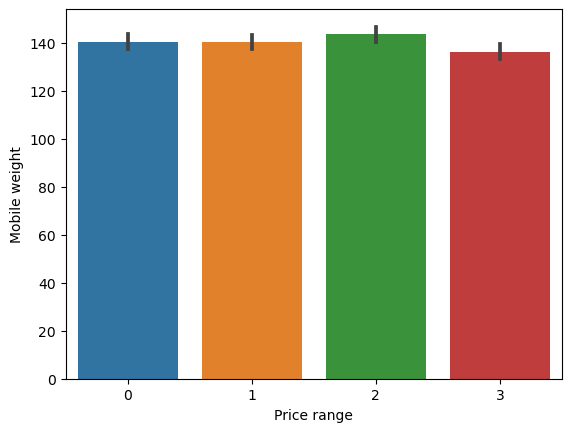

In [8]:
sns.barplot(data=df, x="price_range", y="mobile_wt")
plt.xlabel("Price range")
plt.ylabel("Mobile weight")
plt.show()

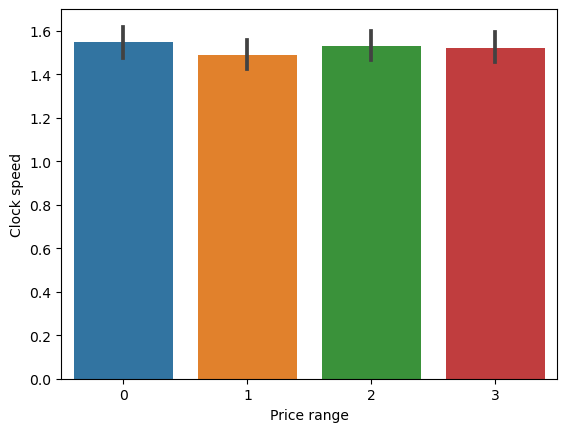

In [9]:
sns.barplot(data=df, x="price_range", y="clock_speed")
plt.xlabel("Price range")
plt.ylabel("Clock speed")
plt.show()

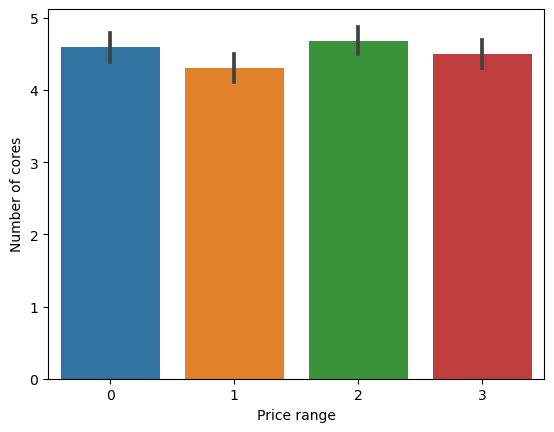

In [10]:
sns.barplot(data=df, x="price_range", y="n_cores")
plt.xlabel("Price range")
plt.ylabel("Number of cores")
plt.show()

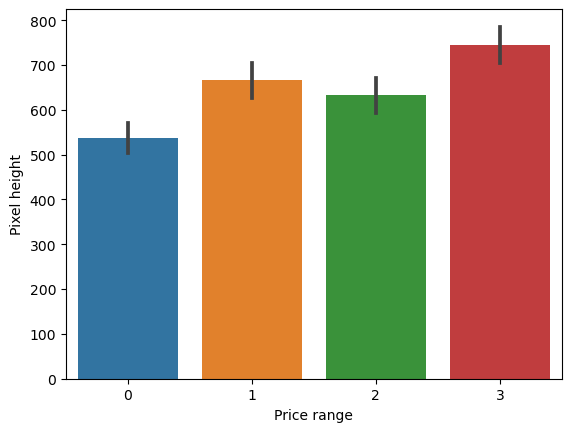

In [11]:
sns.barplot(data=df, x="price_range", y="px_height")
plt.xlabel("Price range")
plt.ylabel("Pixel height")
plt.show()

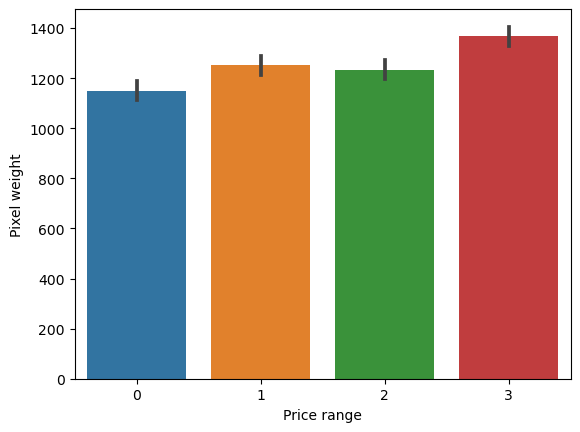

In [12]:
sns.barplot(data=df, x="price_range", y="px_width")
plt.xlabel("Price range")
plt.ylabel("Pixel weight")
plt.show()

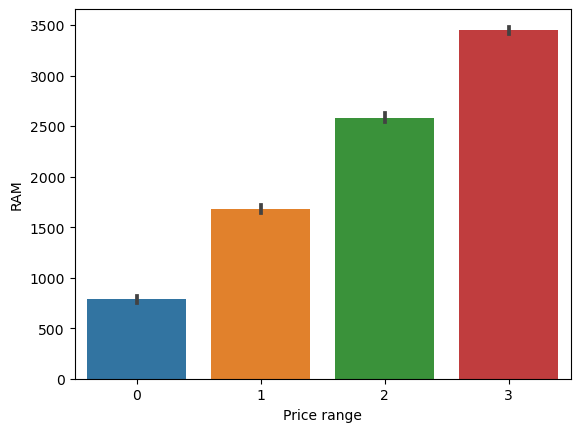

In [13]:
sns.barplot(data=df, x="price_range", y="ram")
plt.xlabel("Price range")
plt.ylabel("RAM")
plt.show()

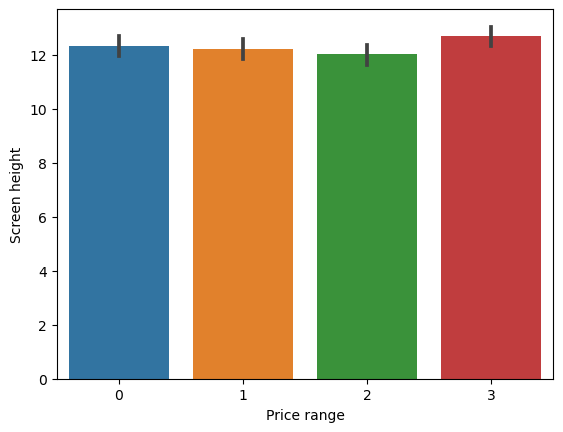

In [14]:
sns.barplot(data=df, x="price_range", y="sc_h")
plt.xlabel("Price range")
plt.ylabel("Screen height")
plt.show()

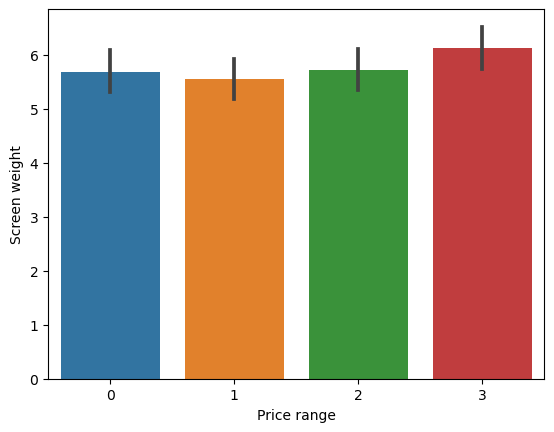

In [15]:
sns.barplot(data=df, x="price_range", y="sc_w")
plt.xlabel("Price range")
plt.ylabel("Screen weight")
plt.show()

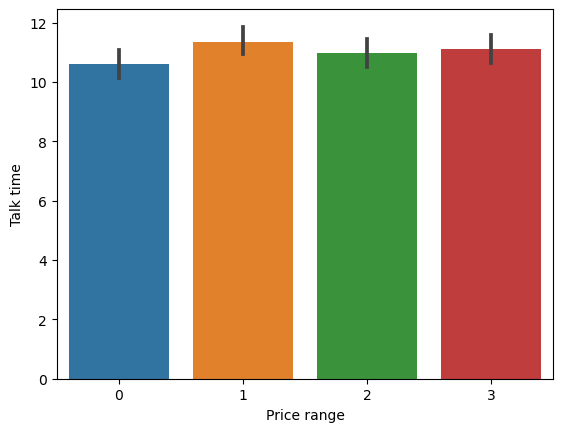

In [16]:
sns.barplot(data=df, x="price_range", y="talk_time")
plt.xlabel("Price range")
plt.ylabel("Talk time")
plt.show()

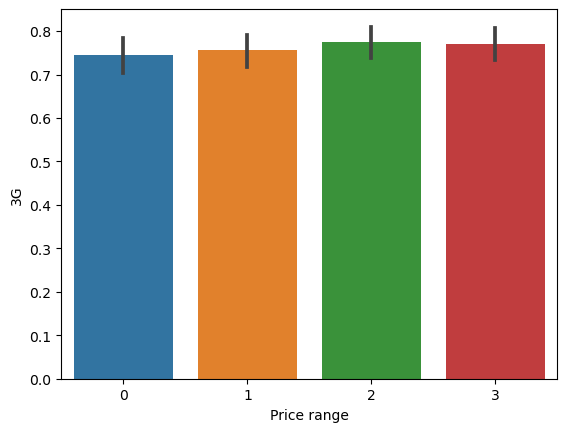

In [17]:
sns.barplot(data=df, x="price_range", y="three_g")
plt.xlabel("Price range")
plt.ylabel("3G")
plt.show()

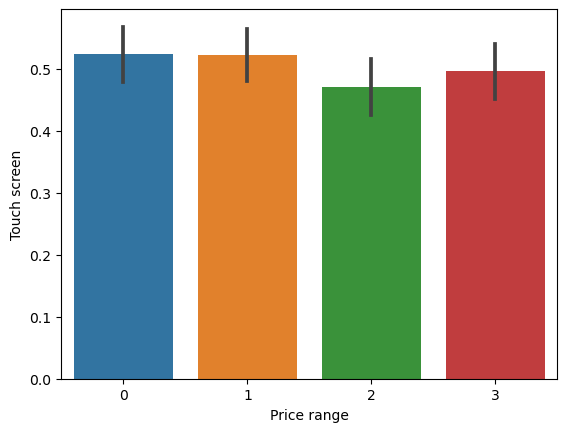

In [18]:
sns.barplot(data=df, x="price_range", y="touch_screen")
plt.xlabel("Price range")
plt.ylabel("Touch screen")
plt.show()

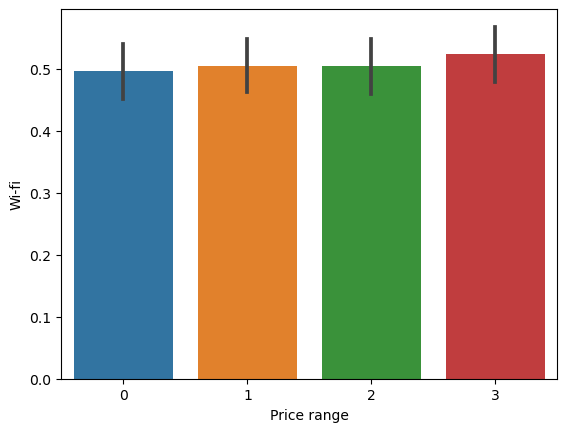

In [19]:
sns.barplot(data=df, x="price_range", y="wifi")
plt.xlabel("Price range")
plt.ylabel("Wi-fi")
plt.show()

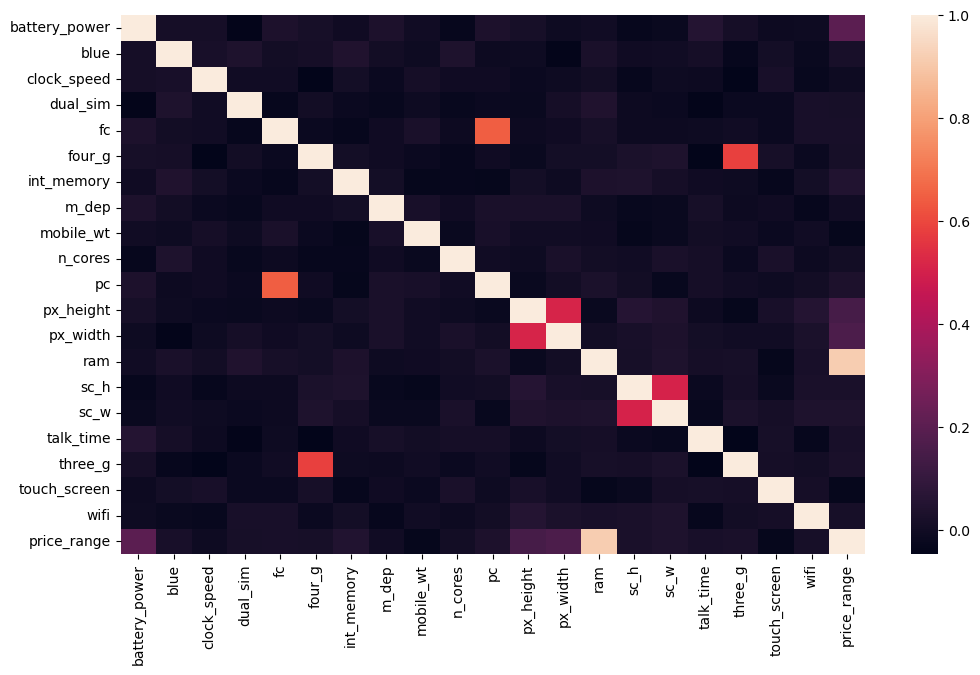

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr())
plt.show()

In [21]:
X = df.drop("price_range", axis=1)
Y = df["price_range"]

In [22]:
scaler = Normalizer()

In [23]:
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=101)

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_pred = model.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        94
           1       0.84      0.90      0.87       102
           2       0.95      0.83      0.89       120
           3       0.89      0.99      0.94        84

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.90       400



In [29]:
cm = confusion_matrix(y_test, y_pred)

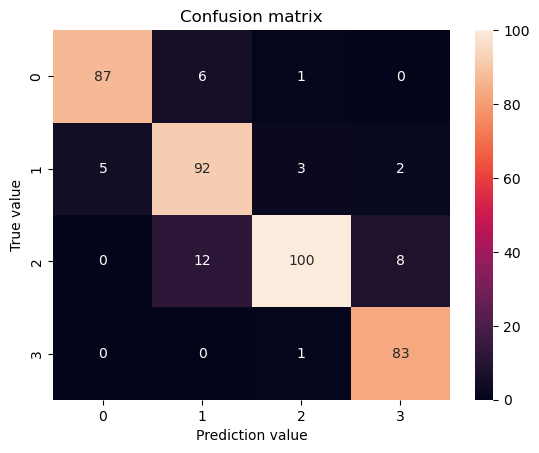

In [30]:
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Prediction value")
plt.ylabel("True value")
plt.show()